<a href="https://colab.research.google.com/github/Ceachi/Liniar-Regression-Learned-Index./blob/master/Liniar_Regression_Learned_Index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import section
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
rng = np.random
np.random.seed(0)

In [0]:
# Parameters
learning_rate = 0.01
training_epochs = 2000
display_step = 100

# Data set Parameters
minArrayNumber = 1
maxArrayNumber = 100
arrayDimension = 100
page_size = 4

In [80]:
# Here we generate 2 arrays
# train_X = is the sorted array (reprezentation of the records)
# train_Y = for each element in vector XX, 
            #in this vector we will determine the page number
            # we assume that a page_size have 4 elements

# Creating the dataSet
train_X = np.array([])
train_Y = np.array([])
j=0
label=1
# Generate the data and labels
for i in range(arrayDimension):
          randomNumber = np.random.randint(low=minArrayNumber, 
                                           high=maxArrayNumber, 
                                           size=1)
          #randomNumber = np.random.uniform(size=1)
          if randomNumber not in train_X: 
            train_X = np.append(train_X, randomNumber)
            train_Y = np.append(train_Y, label)
            j+=1
            if(j%page_size==0):
              label+=1
              j=0
train_X.sort()

n_samples = train_X.shape[0]
# Print the data and labels
print(train_X)  
print(train_Y)

[0.00469548 0.0187898  0.02010755 0.0202184  0.03918779 0.06022547
 0.0641475  0.07103606 0.0871293  0.09394051 0.09609841 0.09710128
 0.10204481 0.11037514 0.11827443 0.11872772 0.12019656 0.1289263
 0.13179786 0.13818295 0.14335329 0.15896958 0.16130952 0.18319136
 0.19658236 0.20887676 0.21038256 0.24442559 0.2532916  0.26455561
 0.26538949 0.28280696 0.28940609 0.2961402  0.31542835 0.31798318
 0.31856895 0.3595079  0.36371077 0.36872517 0.38344152 0.41426299
 0.41466194 0.4236548  0.43703195 0.43758721 0.43860151 0.45615033
 0.46147936 0.46631077 0.4686512  0.52184832 0.52324805 0.52889492
 0.54488318 0.5488135  0.56660145 0.56804456 0.56843395 0.57019677
 0.5759465  0.58651293 0.60276338 0.60484552 0.61209572 0.616934
 0.6176355  0.63992102 0.64589411 0.65310833 0.65632959 0.66676672
 0.66741038 0.67063787 0.6818203  0.69247212 0.6976312  0.71518937
 0.7163272  0.73926358 0.77423369 0.77815675 0.78052918 0.79172504
 0.79915856 0.82099323 0.82894003 0.83261985 0.83794491 0.8700121

In [0]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [0]:
# Construct a linear model pred = w * x + b
pred = tf.add(tf.multiply(X, W), b)

In [0]:
# Mean squared error, mean square error, Cx = (model(key) - pos)**2
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [0]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0100 cost= 0.074873954 W= 0.1661255 b= 0.42886955


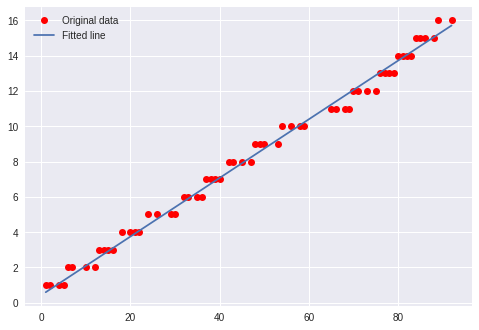

Epoch: 0200 cost= 0.073903732 W= 0.16585724 b= 0.4538457


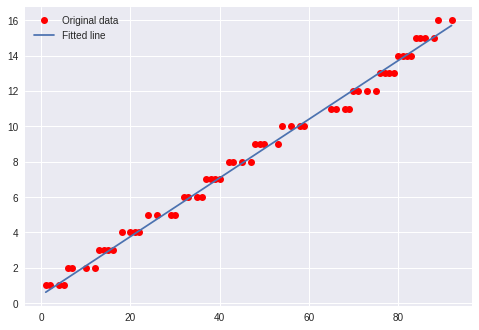

Epoch: 0300 cost= 0.073240794 W= 0.16562864 b= 0.47512308


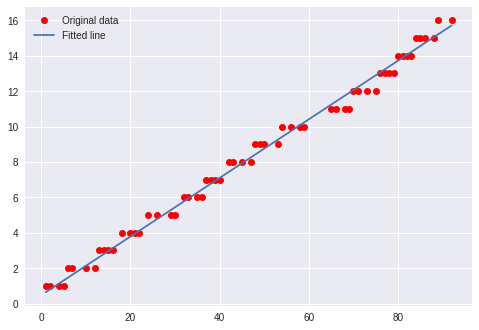

Epoch: 0400 cost= 0.072794780 W= 0.16543391 b= 0.49324915


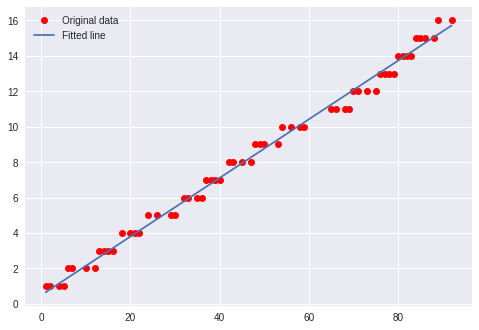

Epoch: 0500 cost= 0.072501071 W= 0.165268 b= 0.5086952


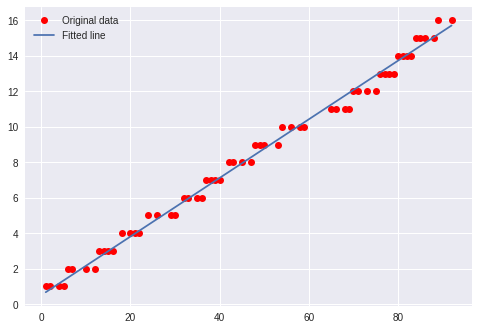

Epoch: 0600 cost= 0.072313458 W= 0.16512671 b= 0.52184653


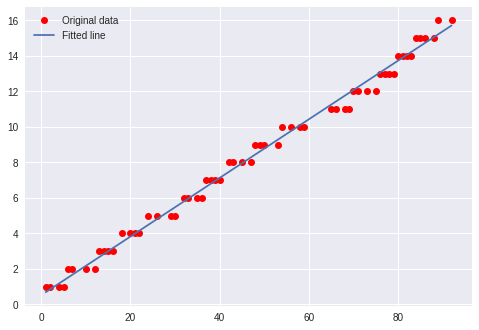

Epoch: 0700 cost= 0.072199009 W= 0.16500638 b= 0.53304607


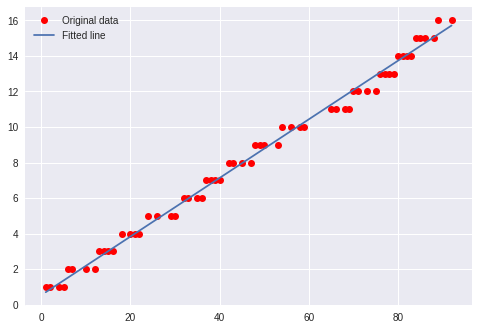

Epoch: 0800 cost= 0.072134458 W= 0.1649038 b= 0.5425967


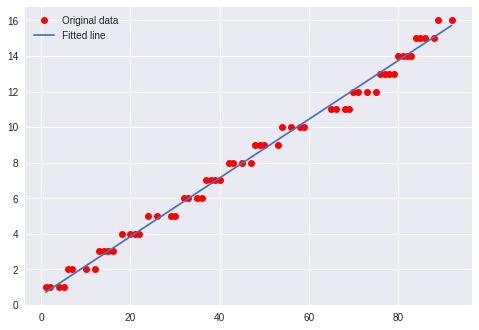

Epoch: 0900 cost= 0.072103389 W= 0.16481656 b= 0.55071956


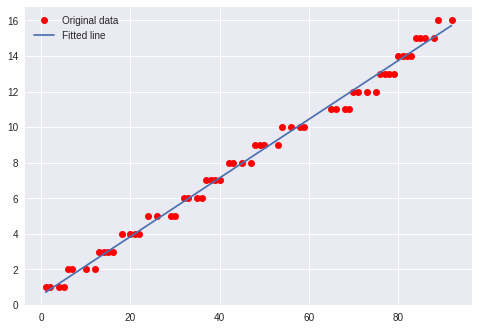

Epoch: 1000 cost= 0.072094157 W= 0.16474196 b= 0.5576604


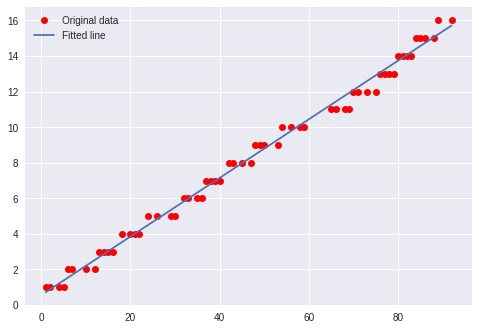

Epoch: 1100 cost= 0.072098993 W= 0.1646787 b= 0.56355184


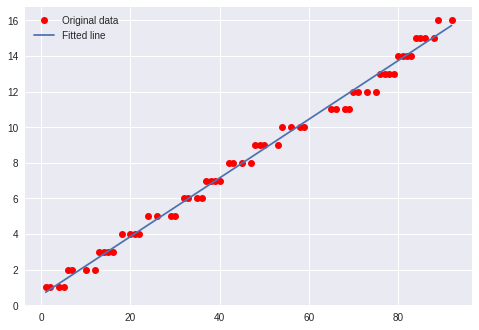

Epoch: 1200 cost= 0.072112203 W= 0.16462469 b= 0.56857836


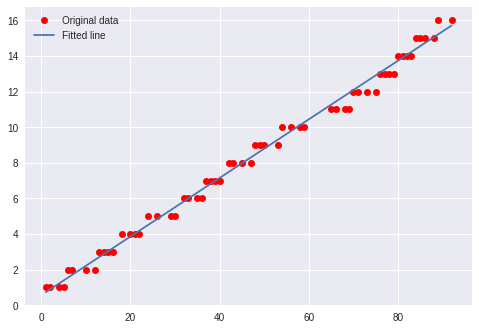

Epoch: 1300 cost= 0.072130039 W= 0.16457868 b= 0.5728594


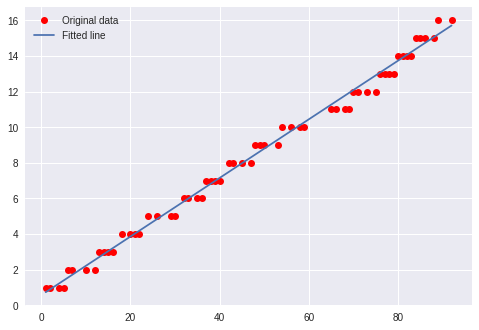

Epoch: 1400 cost= 0.072150208 W= 0.16453935 b= 0.57652164


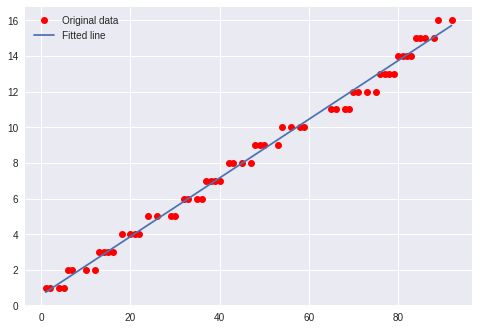

Epoch: 1500 cost= 0.072170958 W= 0.16450587 b= 0.57964116


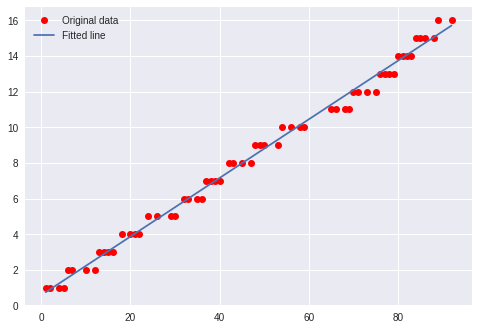

Epoch: 1600 cost= 0.072190955 W= 0.16447742 b= 0.5822877


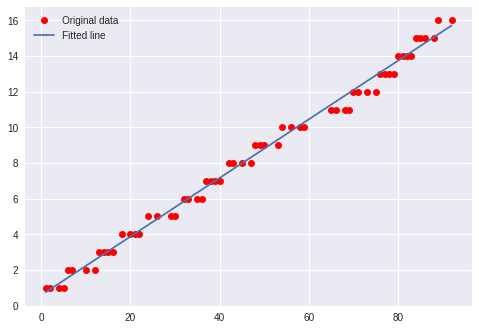

Epoch: 1700 cost= 0.072209768 W= 0.16445331 b= 0.58453065


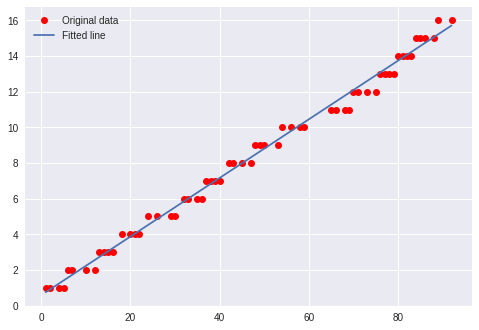

Epoch: 1800 cost= 0.072227158 W= 0.16443278 b= 0.5864433


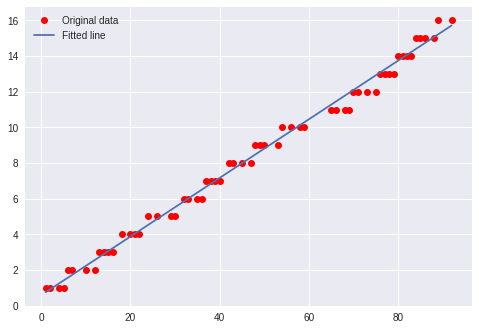

Epoch: 1900 cost= 0.072243094 W= 0.16441512 b= 0.5880871


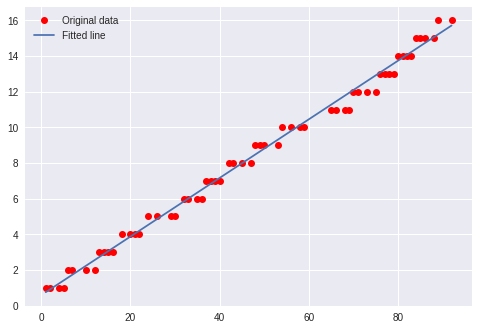

Epoch: 2000 cost= 0.072257213 W= 0.16440026 b= 0.5894705


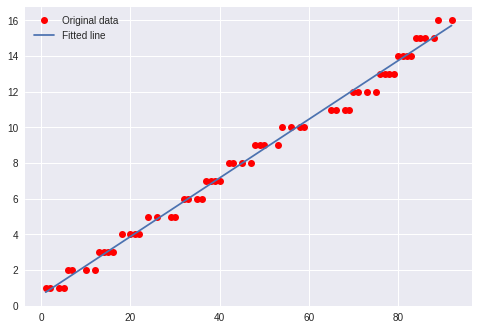

In [77]:
# Add ops to save and restore all the variables.
saver = tf.train.Saver()

# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))
            #Graphic display
            plt.plot(train_X, train_Y, 'ro', label='Original data')
            plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
            plt.legend()
            plt.show()
    save_path = saver.save(sess, "/tmp/model.ckpt")

In [0]:
def binarySearch(arr, l, r, x):
  if r >= l:
    mid = int(l + (r - l) / 2)
  if arr[mid] == x:
    return mid
  elif arr[mid] > x:
    return binarySearch(arr, l, mid - 1, x)
  else:
    return binarySearch(arr, mid + 1, r, x)
  return -1

In [69]:
key = 92.0
pageNumber = tf.Variable(0.0)
var_test = tf.Variable(key)
calculate = tf.add(tf.multiply(W, var_test), b)
update_operation = tf.assign(pageNumber, calculate)

with tf.Session() as session:
  session.run(tf.global_variables_initializer())
  saver.restore(session, "/tmp/model.ckpt")
  print("W : %s" % W.eval())
  print("b : %s" % b.eval())
  session.run(update_operation)
  print(session.run(pageNumber))
  starting_point = (pageNumber - 1) * page_size
  ending_point = starting_point + (page_size - 1)
  left = int(starting_point.eval())
  right = int(ending_point.eval())
  print("the pozition of the key ",key," is ",binarySearch(train_X,left,right,key))
  

INFO:tensorflow:Restoring parameters from /tmp/model.ckpt
W : 0.16440026
b : 0.5894705
2.726674
the pozition of the key  13.0  is  8
